# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [76]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [77]:
# url string that hosts our .csv file
url = "../../NotebooksProfessor/cartwheel.csv"
# Read the .csv file and store it as a pandas Data Frame

df = pd.read_csv(url)

# Exploring the content of the data set

Get a general 'feel' of the data


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             52 non-null     int64  
 1   Age            51 non-null     float64
 2   Gender         52 non-null     object 
 3   GenderGroup    52 non-null     int64  
 4   Glasses        52 non-null     object 
 5   GlassesGroup   52 non-null     int64  
 6   Height         51 non-null     float64
 7   Wingspan       51 non-null     float64
 8   CWDistance     52 non-null     int64  
 9   Complete       52 non-null     object 
 10  CompleteGroup  51 non-null     float64
 11  Score          52 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 5.0+ KB


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [79]:
# Number of times that each distinct value of a variable occurs in a data set

gender_counts = df['Gender'].value_counts()
glasses_counts = df['Glasses'].value_counts()
complete_counts = df['Complete'].value_counts()
gender_group_counts = df['GenderGroup'].value_counts()

# Display the frequency tables
print(gender_counts)
print(glasses_counts)
print(complete_counts)
print(gender_group_counts)


Gender
F    26
M    26
Name: count, dtype: int64
Glasses
Y    26
N    26
Name: count, dtype: int64
Complete
Y    44
N     8
Name: count, dtype: int64
GenderGroup
1    26
2    26
Name: count, dtype: int64


In [80]:
# Proportion of each distinct value of a variable occurs in a data set

gender_proportion = df['Gender'].value_counts(normalize=True)
glasses_proportion = df['Glasses'].value_counts(normalize=True)
complete_proportion = df['Complete'].value_counts(normalize=True)
gender_group_proportion = df['GenderGroup'].value_counts(normalize=True)

# Display the proportion tables
print(gender_proportion)
print(glasses_proportion)
print(complete_proportion)
print(gender_group_proportion)


Gender
F    0.5
M    0.5
Name: proportion, dtype: float64
Glasses
Y    0.5
N    0.5
Name: proportion, dtype: float64
Complete
Y    0.846154
N    0.153846
Name: proportion, dtype: float64
GenderGroup
1    0.5
2    0.5
Name: proportion, dtype: float64


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [81]:
# Total number of observations
total_observations = len(df)
print("total obs: ", total_observations)

# total number of null observations in Age
missing_age = df['Age'].isnull().sum()
print("total obs of null in age: ", total_observations)

# Total number of counts in Age (excluding missing values)
age_counts = df['Age'].value_counts()
print("total age counts: ", age_counts.sum())

total obs:  52
total obs of null in age:  52
total age counts:  51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

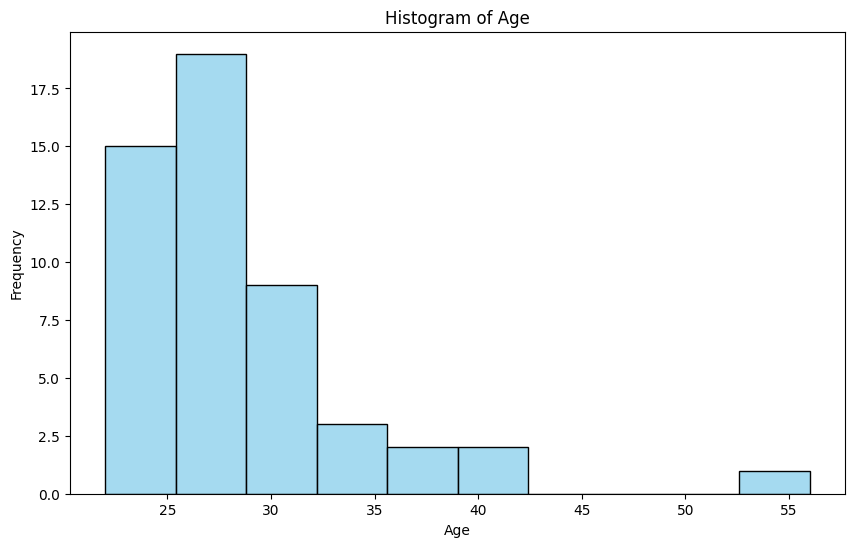

In [82]:
# Plot histogram of Age
import matplotlib.pyplot as plt
import seaborn as sns

######## PART CODED WITH HELP OF GPT4.0
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=False, bins=10, color='skyblue', edgecolor='black')
########

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


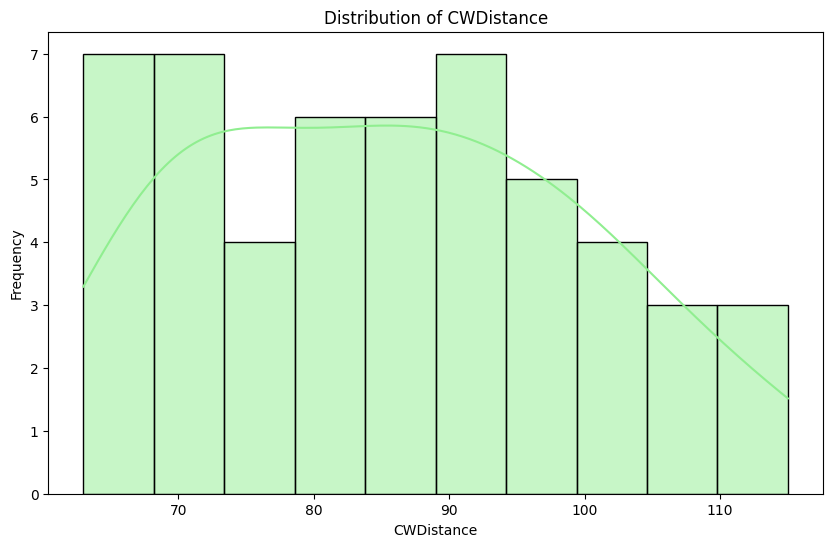

In [83]:
# Plot distribution of CWDistance


plt.figure(figsize=(10, 6))
sns.histplot(df['CWDistance'].dropna(), kde=True, color='lightgreen', bins=10, edgecolor='black')

plt.title('Distribution of CWDistance')
plt.xlabel('CWDistance')
plt.ylabel('Frequency')

plt.show()

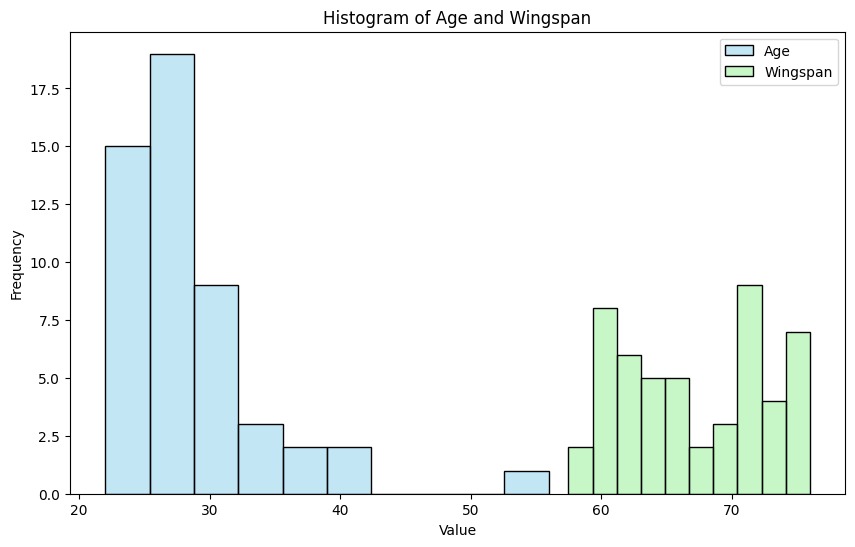

In [84]:
# Plot histogram of both the Age and the Wingspan

plt.figure(figsize=(10, 6))

sns.histplot(df['Age'].dropna(), kde=False, bins=10, color='skyblue', label='Age', edgecolor='black', alpha=0.5)
sns.histplot(df['Wingspan'].dropna(), kde=False, bins=10, color='lightgreen', label='Wingspan', edgecolor='black', alpha=0.5)

plt.title('Histogram of Age and Wingspan')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()

plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

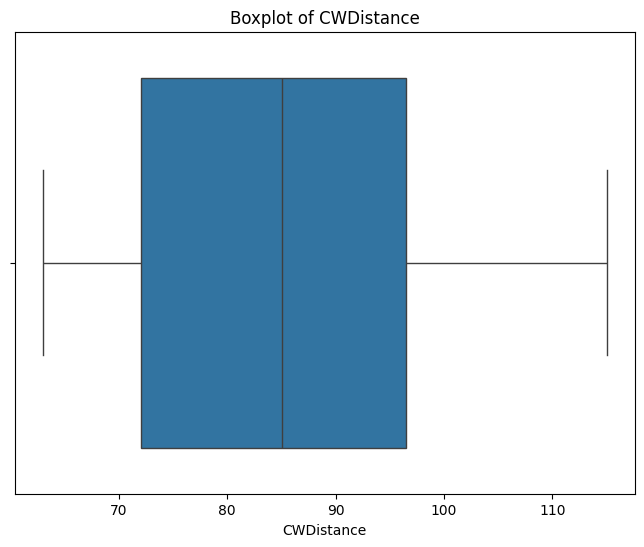

In [85]:
# Create the boxplot of the "CWDistance"

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CWDistance'])

plt.title('Boxplot of CWDistance')
plt.xlabel('CWDistance')

plt.show()

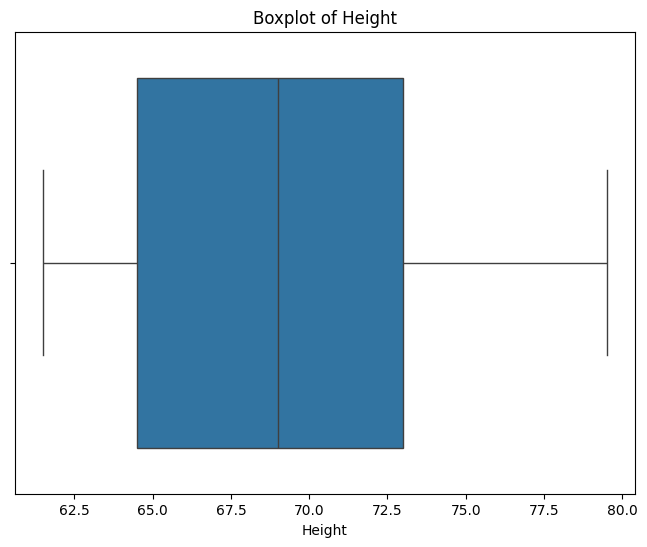

In [86]:
# Create the boxplot of the "Height"

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Height'])

plt.title('Boxplot of Height')
plt.xlabel('Height')

plt.show()

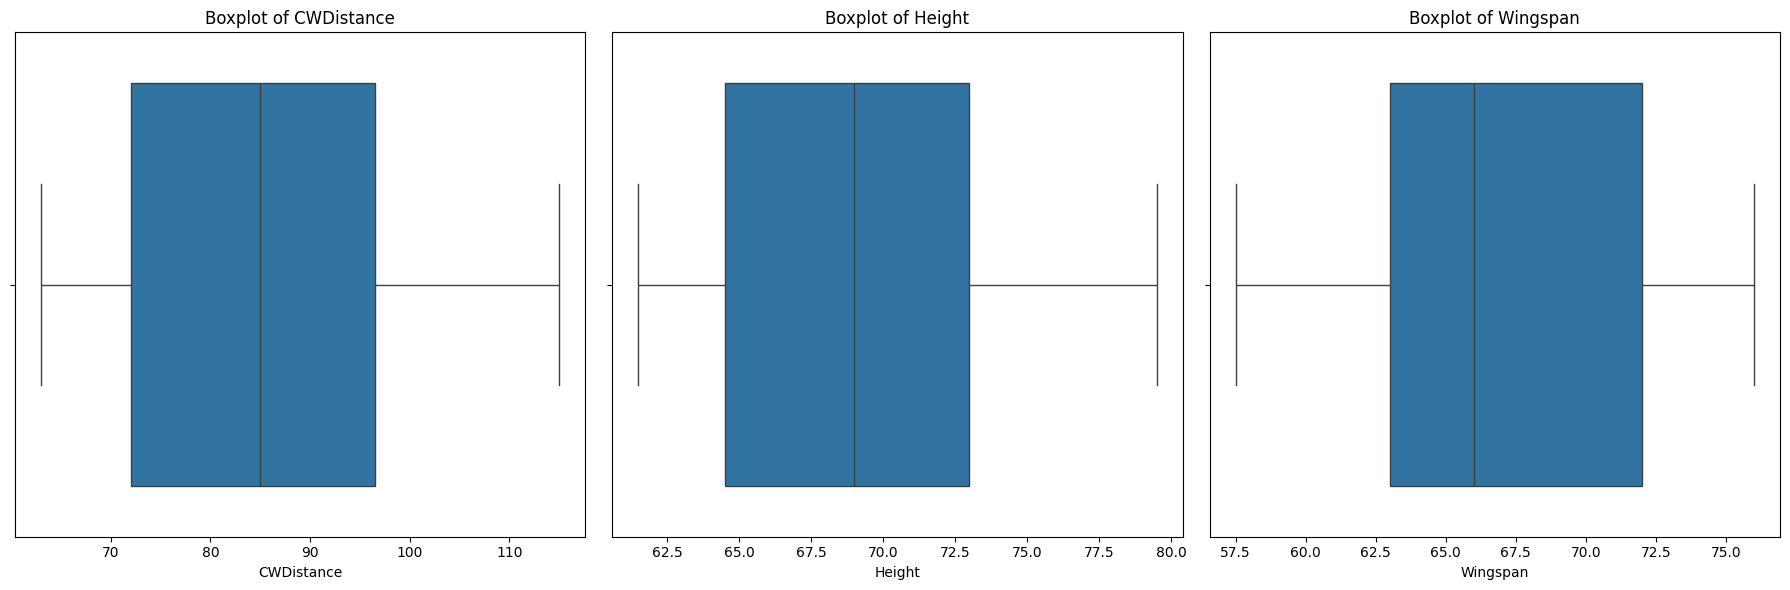

In [87]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['CWDistance'], ax=axes[0])
axes[0].set_title('Boxplot of CWDistance')
axes[0].set_xlabel('CWDistance')

sns.boxplot(x=df['Height'], ax=axes[1])
axes[1].set_title('Boxplot of Height')
axes[1].set_xlabel('Height')

sns.boxplot(x=df['Wingspan'], ax=axes[2])
axes[2].set_title('Boxplot of Wingspan')
axes[2].set_xlabel('Wingspan')

plt.tight_layout()

plt.show()

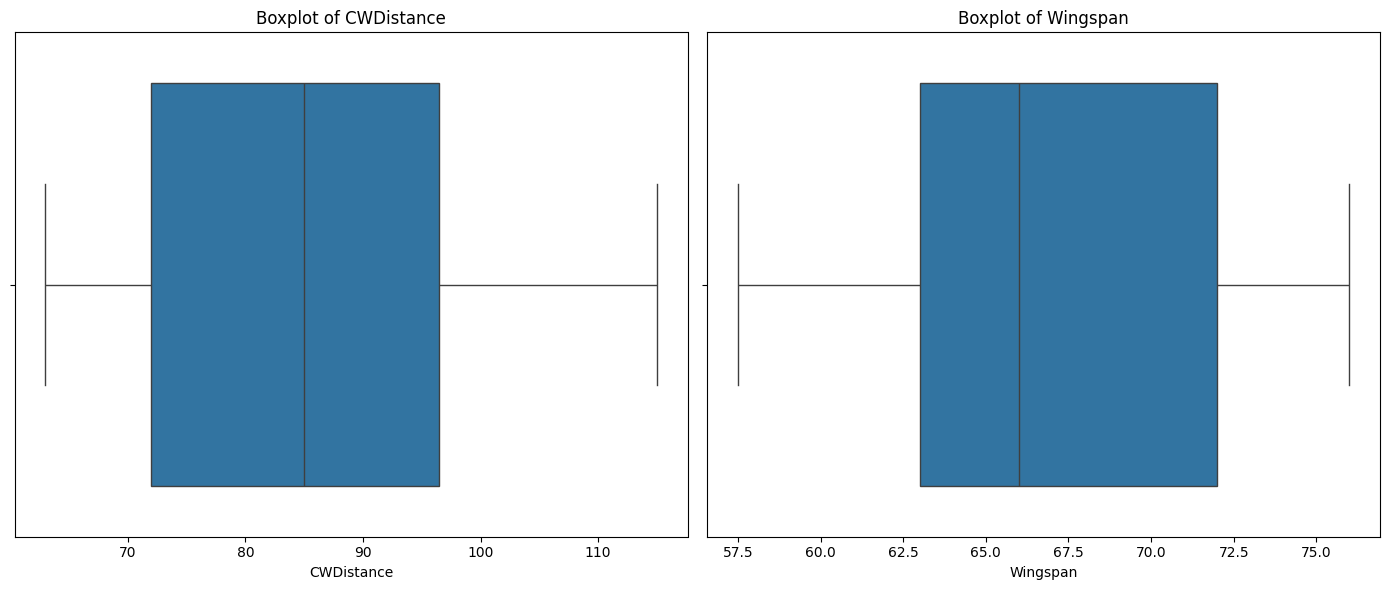

In [88]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x=df['CWDistance'], ax=axes[0])
axes[0].set_title('Boxplot of CWDistance')
axes[0].set_xlabel('CWDistance')

sns.boxplot(x=df['Wingspan'], ax=axes[1])
axes[1].set_title('Boxplot of Wingspan')
axes[1].set_xlabel('Wingspan')

plt.tight_layout()

# Show the plot
plt.show()


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

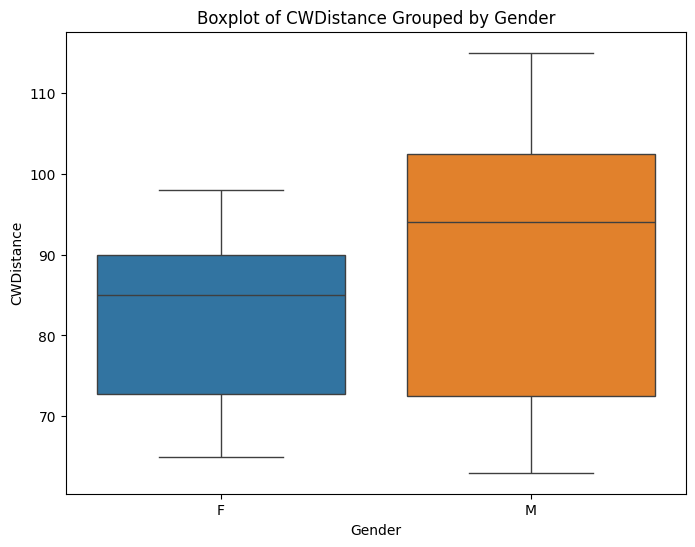

In [89]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
#sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)

# Made with help of GPT4.0
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='CWDistance', hue='Gender')

plt.title('Boxplot of CWDistance Grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('CWDistance')

plt.show()

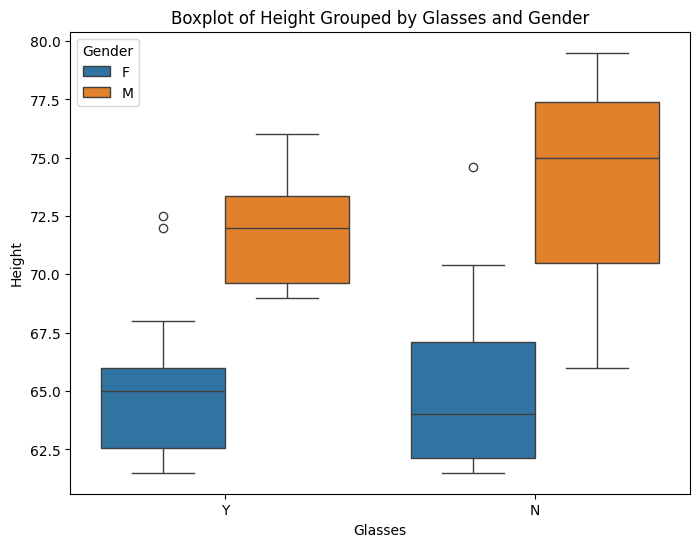

In [90]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
#sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Glasses', y='Height', hue='Gender')

plt.title('Boxplot of Height Grouped by Glasses and Gender')
plt.xlabel('Glasses')
plt.ylabel('Height')

plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

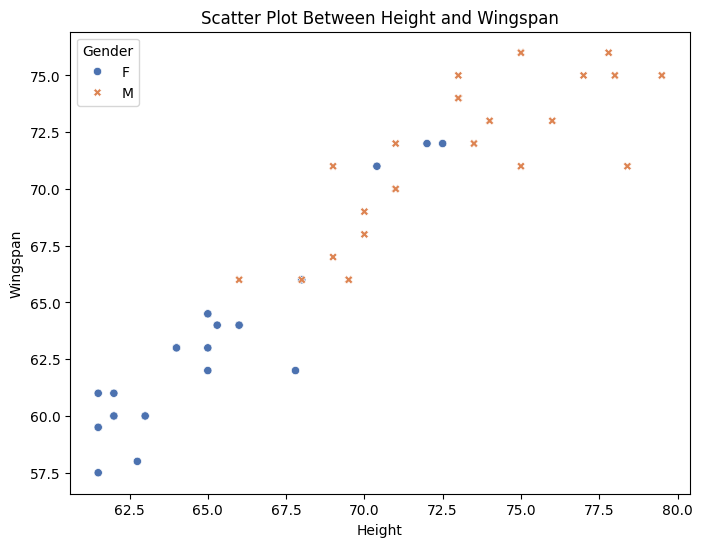

In [91]:
# scatter plot between two variables

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', style='Gender', palette='deep')

plt.title('Scatter Plot Between Height and Wingspan')
plt.xlabel('Height')
plt.ylabel('Wingspan')

plt.show()

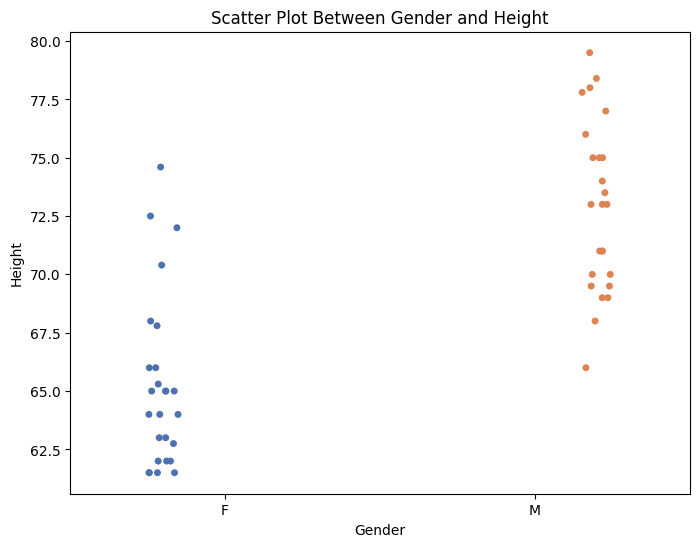

In [92]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='Gender', y='Height', jitter=True, hue='Gender', palette='deep', dodge=True)

plt.title('Scatter Plot Between Gender and Height')
plt.xlabel('Gender')
plt.ylabel('Height')

plt.show()

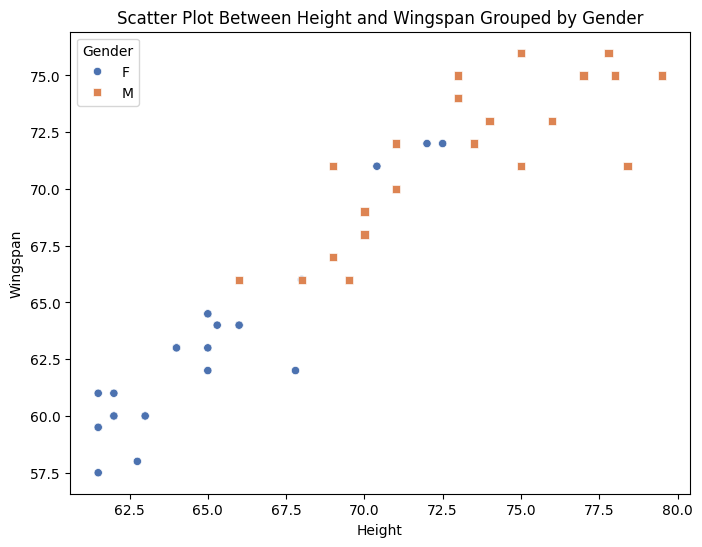

In [93]:
# scatter plot between two variables grouped according to a categorical variable

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', palette='deep', style='Gender', markers=['o', 's'])

plt.title('Scatter Plot Between Height and Wingspan Grouped by Gender')
plt.xlabel('Height')
plt.ylabel('Wingspan')

plt.show()

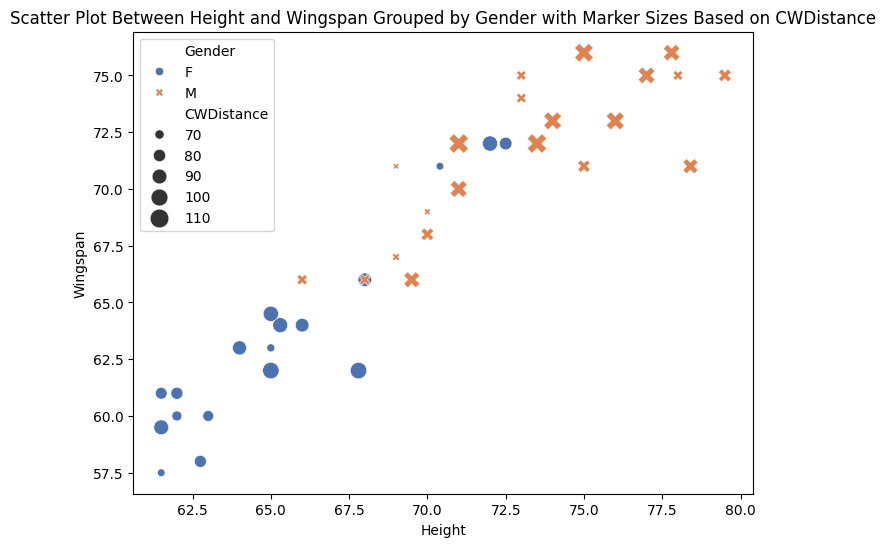

In [94]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', size='CWDistance', sizes=(20, 200), palette='deep', style='Gender')

plt.title('Scatter Plot Between Height and Wingspan Grouped by Gender with Marker Sizes Based on CWDistance')
plt.xlabel('Height')
plt.ylabel('Wingspan')

plt.show()

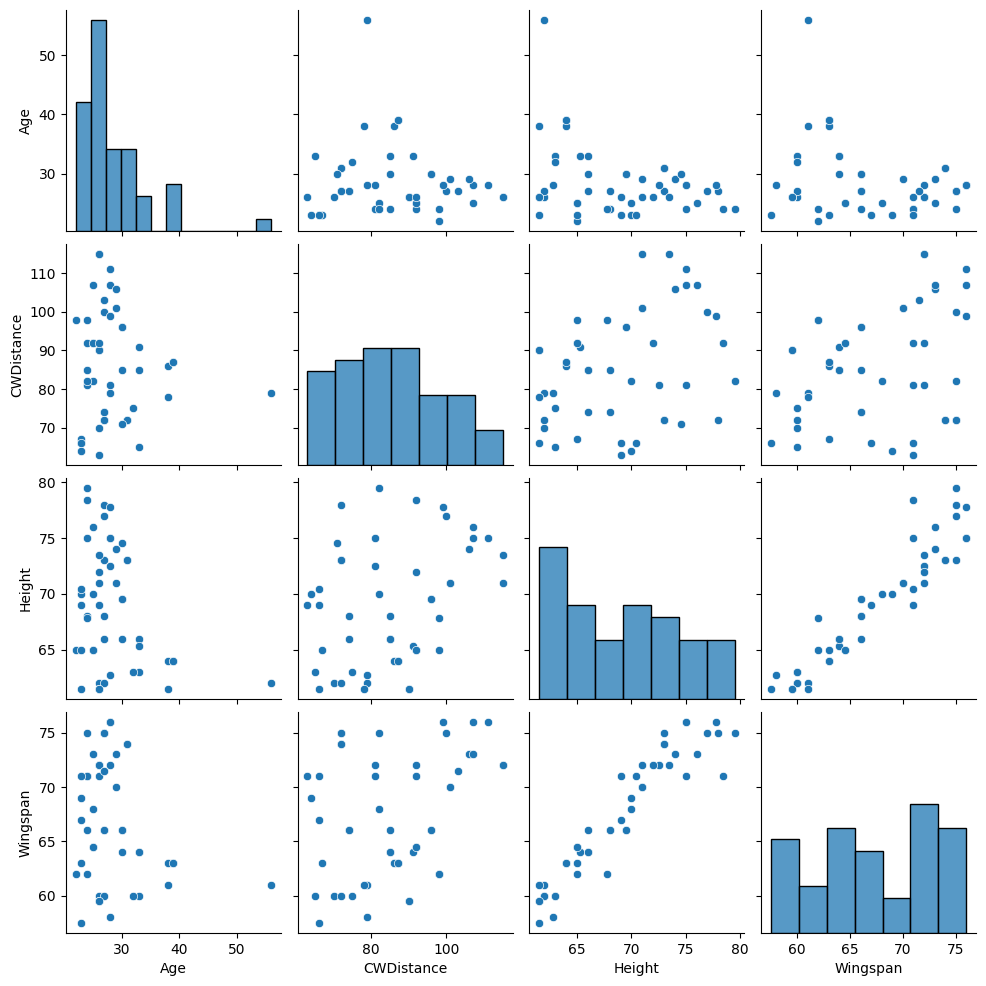

In [95]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'

selected_columns = ['Age', 'CWDistance', 'Height', 'Wingspan']
df_selected = df[selected_columns]

sns.pairplot(df_selected)

plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [ ]:
from sklearn.datasets import load_iris


# Load the iris dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

############ Codded with chatGPT
iris['target'] = iris_data.target
iris['species'] = iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
############

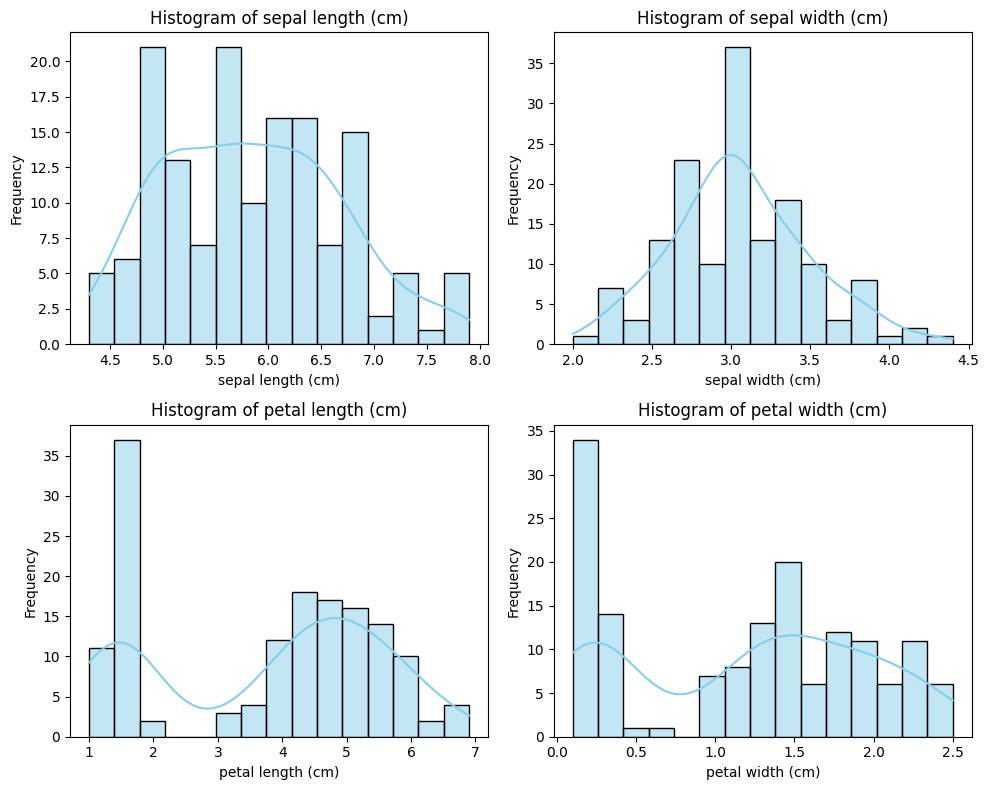

In [97]:
# 1. Plot the histograms for each of the four quantitative variables
plt.figure(figsize=(10, 8))

for i, column in enumerate(iris.columns[:-2]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris[column], kde=True, bins=15, color='skyblue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

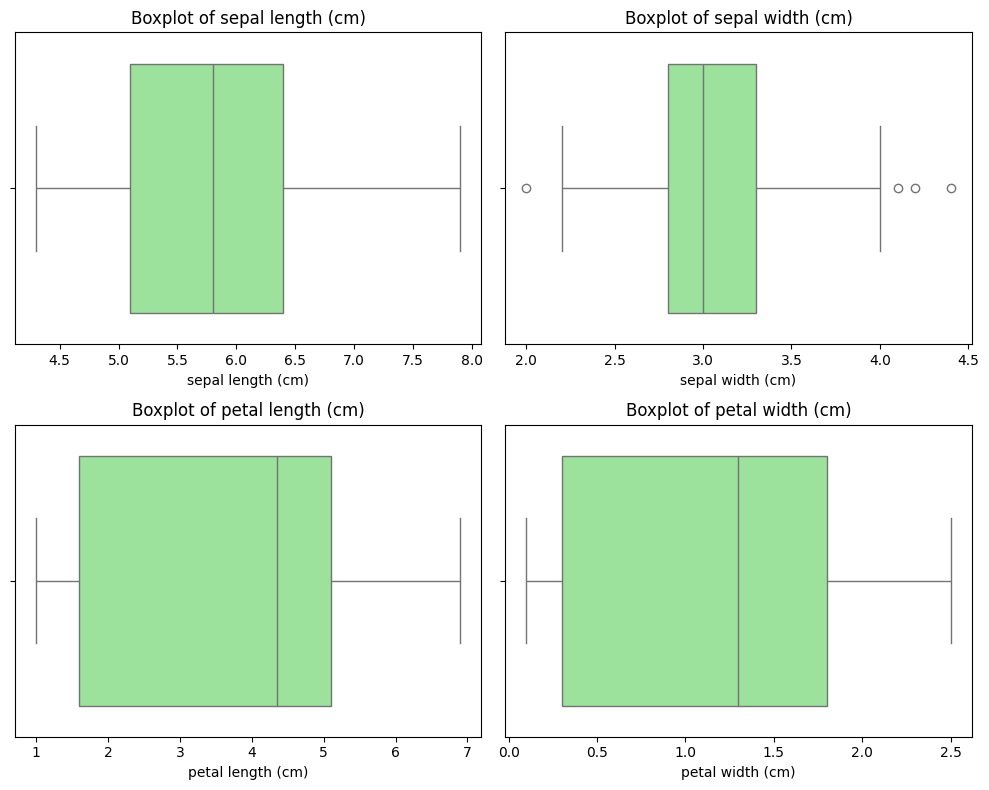

In [98]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(iris.columns[:-2]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=iris[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

C:\Users\seval\AppData\Local\Temp\ipykernel_25288\243086557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal width (cm)', data=iris, palette='Set2')


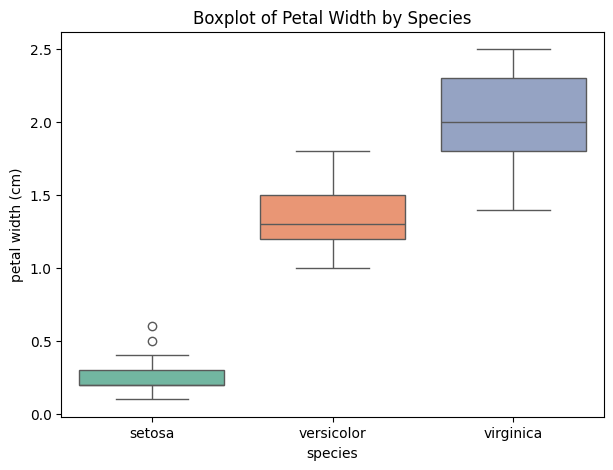

In [99]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='species', y='petal width (cm)', data=iris, palette='Set2')
plt.title('Boxplot of Petal Width by Species')
plt.show()


C:\Users\seval\AppData\Local\Temp\ipykernel_25288\3831021959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=iris, palette='Set2')


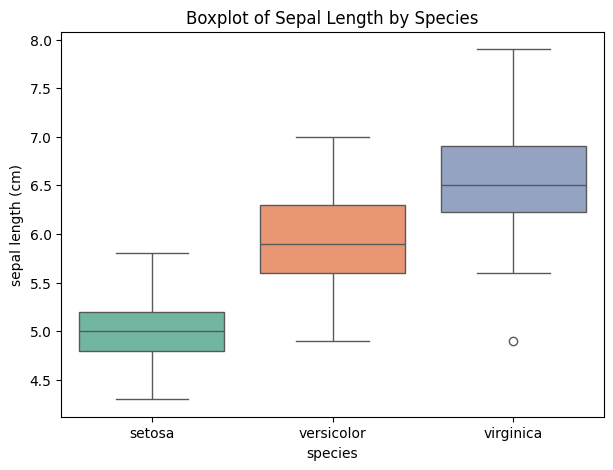

In [101]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='species', y='sepal length (cm)', data=iris, palette='Set2')
plt.title('Boxplot of Sepal Length by Species')
plt.show()    

In [ ]:
# Observations:
# Sepal length: Virginica has the longest sepal lengths.
# Sepal width: Setosa has a concentration of narrower sepals.
# Petal length: Big differences, Virginica has the largest petals.
# Petal width: Follow almost the same trend but Virginica has the widest petals.